In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


import os
from pathlib import Path
import time
from collections import OrderedDict, namedtuple

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
if IN_COLAB:

    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    datadir = '/drive/My Drive/Colab Notebooks/Datasets/'
    optim_dir = datadir + '/optim_dir/'
    results_folder = datadir+'/results/UCI/'
    Path(results_folder).mkdir(parents=True, exist_ok=True)
    Path(optim_dir).mkdir(parents=True, exist_ok=True)
else:
  results_folder = 'results'
  optim_dir = 'optim_dir'
  Path("results").mkdir(parents=True, exist_ok=True)
  Path(optim_dir).mkdir(parents=True, exist_ok=True)


# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

Mounted at /drive


In [4]:
import sys

!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

if IN_COLAB:
  
  scripts_dir = '/drive/My Drive/Colab Notebooks/scripts/'
  sys.path.insert(1, scripts_dir)
# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

# insert at 1, 0 is the script path (or '' in REPL)
else:
    sys.path.insert(1, 'scripts')
from geneticalgorithm import geneticalgorithm as ga
import pickle

     |████████████████████████████████| 80 kB 5.7 MB/s 


In [5]:
# Enable GPU processing
# if IN_COLAB:
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# else:
#     device = torch.device("cpu")
# print(f'Device type: {device}')

In [6]:
# Set random seed
seed = 777
# torch.manual_seed(seed)
model = None

In [7]:
import random
def seeding(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    os.environ['TF_CUDNN_DETERMINISTIC'] = str(SEED)
    # tf.random.set_seed(SEED)
    print('seeding done!!!')
seeding(seed)

seeding done!!!


In [8]:
df = pd.read_csv(f"{datadir}UCI/Adult/data.csv")

In [9]:
df.shape
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
df.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- workclass-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----- education-----
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----- marital.status-----
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
----- occupation-----
Prof-special

In [14]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

## Data Preprocessing

In [15]:
df = df.replace('?', np.nan)

In [16]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [17]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [19]:
X = df.drop('income', axis=1)
Y = df['income']

In [20]:
selector = ExtraTreesClassifier(random_state=42)

In [21]:
selector.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [22]:
feature_imp = selector.feature_importances_

In [23]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [25]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [26]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [27]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [28]:
ros = RandomOverSampler(random_state=42)

In [29]:
ros.fit(X, Y)

RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [30]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


In [33]:
# Create a class to manage the training / hyperparameter runs
class RunManager():
  def __init__(self):
    self.run_params = None
    self.run_count = 0
    self.run_data = []
    
    #---
    self.results = None

  def begin_run(self, run):
    self.run_params = run
    self.run_count += 1
    

  def end_run(self, train_accuracy, test_accuracy):
    # self.epoch_count = 0
    # train_accuracy = 
    # test_accuracy = 

    print(f'run_params: {self.run_params} Train Acc: {train_accuracy} Test Acc: {test_accuracy}')

    results = OrderedDict()
    results['run'] = self.run_count
    results['train acc'] = train_accuracy
    results['test acc'] = test_accuracy
    
    # ---
    self.results = results

    for k, v in self.run_params.items():
      results[k] = v

    self.run_data.append(results)

  def save_output(self, filename):
    if filename:
      filename = filename
      pd.DataFrame.from_dict(self.run_data, orient='columns').to_csv(f'{filename}.csv')
      
      # with open(f'{filename}.json', 'w', encoding='utf-8') as f:
      #   json.dump(self.run_data, f, ensure_ascii=False, indent=4)

      # print('Results saved to disk')

    return pd.DataFrame.from_dict(self.run_data, orient='columns')


In [34]:
# Define training loop execution
def execution_loop(m, args): # args is given by the optimizer
    agent = {}
    agents = []
    
    agent['n'] = args[0].astype(int)
    agent['m'] = int(args[1])
    agents.append(agent)
#     m = RunManager()
    for run in agents: # this should be one. a particle in pso

        # print(f'Run Params: {run}')

        m.begin_run(run)

        num_predictors = X_train.shape[1]
        if run['m'] <= num_predictors:

          rfc = RandomForestClassifier(n_estimators=run['n'], max_features=run['m'], random_state=42)
          rfc.fit(X_train, y_train)

          y_pred_train = rfc.predict(X_train)
          y_pred_test = rfc.predict(X_test)

          train_score = accuracy_score(y_train, y_pred_train)
          test_score = accuracy_score(y_test, y_pred_test)
        else:
          train_score = 0
          test_score = 0

        m.end_run(train_score, test_score)
    return m.results['test acc']

In [35]:
# Define training run hyperparameters
params = {
    'n' : [1, 200],
    'm' : [1, 20]
}

# params = OrderedDict(
#     lr = [0, 1],
#     batch_size = [20 2000],
#     n_epochs = [3]
# )

In [36]:
m = RunManager()
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'Run_Results-UCI-Adult-GA-{timestr}'
# filename = 'Run_Results-PSO-20210504-035642-cont.csv' # this is for trying to continue from last optim save


In [37]:
def run_train_model(agent):
    test_acc = execution_loop(m, agent)
    m.save_output(f'{results_folder}/{filename}')
    print("test acc: ", test_acc)
    return test_acc * -1

run_params: {'n': 31, 'm': 6} Train Acc: 0.9995196197411004 Test Acc: 0.919700647249191
test acc:  0.919700647249191
run_params: {'n': 13, 'm': 9} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 167, 'm': 18} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 145, 'm': 15} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 54, 'm': 13} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 19, 'm': 2} Train Acc: 0.998609425566343 Test Acc: 0.9223300970873787
test acc:  0.9223300970873787
run_params: {'n': 118, 'm': 7} Train Acc: 0.9999494336569579 Test Acc: 0.9232402912621359
test acc:  0.9232402912621359
run_params: {'n': 197, 'm': 12} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 136, 'm': 11} Train Acc: 0 Test Acc: 0
test acc:  0
run_params: {'n': 54, 'm': 8} Train Acc: 0.9998988673139159 Test Acc: 0.9230380258899676
test acc:  0.9230380258899676
run_params: {'n': 45, 'm': 4} Train Acc: 0.9997977346278317 Test Acc: 0.9242516181229773
test acc:  0.9242516

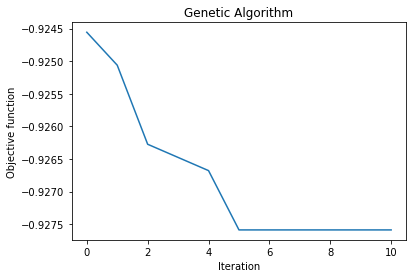

Time to execute: 667.6372 seconds


NameError: ignored

In [38]:
verbose = True
pop_size = 15   
max_iter = 10

obj_func = run_train_model

lb = [params['n'][0], params['m'][0]]
ub = [params['n'][1], params['m'][1]]

algorithm_param = {'max_num_iteration': max_iter,\
                   'population_size':pop_size,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0.3,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound = np.array([ [ lb[0], ub[0] ], [ lb[1], ub[1] ] ] )

tic = time.perf_counter() # Start time counter
model=ga(function=obj_func,dimension=2,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param, function_timeout=1000)
model.run(f"{optim_dir}/ga_data-UCI-Adult-{timestr}.data")

toc = time.perf_counter() # End time counter
print(f'Time to execute: {toc - tic:0.4f} seconds')
print(f'Best Position: {[int(x) for x in best_pos1]} Best Solution: {best_fit1:0.5f}')

# m.save_output(f'{results_folder}/{filename}')
# print('Results saved.')
